<a href="https://colab.research.google.com/github/chiku27/Technocolabs_Major_Project/blob/main/EDA_Pre_processing_Reditt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_json('/content/gdrive/MyDrive/Colab Notebooks/Major_Project/sample_data.json',lines=True)
df.head()

author author_flair_css_class  ... subreddit_id author_cakeday
0         Dethcola                         ...     t5_2qq2q            NaN
1       PennyBotV2          flair2-penny1  ...     t5_2vhg0            NaN
2      Sir_Firebum              HOU-wagon  ...     t5_2qm7u            NaN
3        deanzynut            woodcutting  ...     t5_2wbww            NaN
4  OfullOstomacheO                   None  ...     t5_2ti4h            NaN

[5 rows x 21 columns]

In [4]:
df.shape

(10000, 21)

In [5]:
df.columns

Index(['author', 'author_flair_css_class', 'author_flair_text', 'body',
       'can_gild', 'controversiality', 'created_utc', 'distinguished',
       'edited', 'gilded', 'id', 'is_submitter', 'link_id', 'parent_id',
       'permalink', 'retrieved_on', 'score', 'stickied', 'subreddit',
       'subreddit_id', 'author_cakeday'],
      dtype='object')

Dropping out some columns which seems less important towards the predictions

In [6]:
df1=df.drop(columns=['author_flair_css_class','author_flair_text','distinguished','id','link_id','parent_id','permalink','author_cakeday','subreddit_id'])
df1.head()

author  ...          subreddit
0         Dethcola  ...           sandiego
1       PennyBotV2  ...               RWBY
2      Sir_Firebum  ...           baseball
3        deanzynut  ...          2007scape
4  OfullOstomacheO  ...  mildlyinteresting

[5 rows x 12 columns]

In [7]:
df1.isnull().sum()

author              0
body                0
can_gild            0
controversiality    0
created_utc         0
edited              0
gilded              0
is_submitter        0
retrieved_on        0
score               0
stickied            0
subreddit           0
dtype: int64

In [8]:
len(df1['subreddit'].unique())

2275

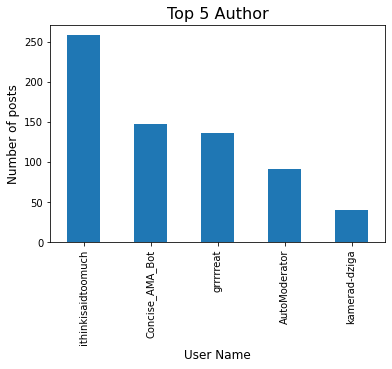

In [9]:
df1['author'].value_counts()[1:6].plot(kind='bar')
plt.title('Top 5 Author', fontsize=16)
plt.xlabel('User Name', fontsize=12)
plt.ylabel('Number of posts', fontsize=12)
plt.show()

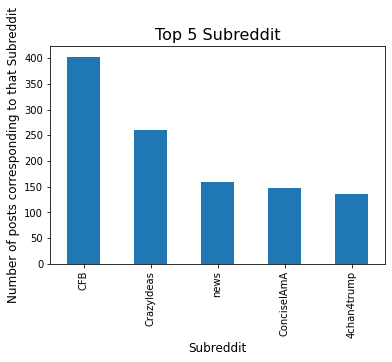

In [10]:
df1['subreddit'].value_counts()[1:6].plot(kind='bar')
plt.title('Top 5 Subreddit', fontsize=16)
plt.xlabel('Subreddit', fontsize=12)
plt.ylabel('Number of posts corresponding to that Subreddit', fontsize=12)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


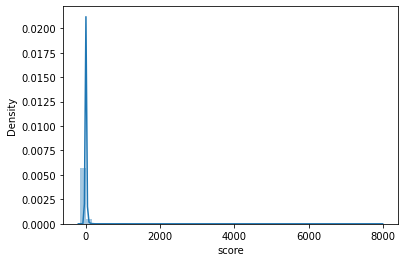

In [11]:
sns.distplot(df1['score'])#distribution of number of upvotes

In [12]:
df1['score'].describe()

count    10000.000000
mean         8.110300
std        110.980997
min       -148.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       7934.000000
Name: score, dtype: float64

In [13]:
no_down=len(df1['score'][df1.score < 0])
no_up=len(df1['score'][df1.score >= 0])
print('No of posts having negative score\n',no_down)#means downvotes is more than upvotes
print('No of posts having positive score\n',no_up)

No of posts having negative score
 305
No of posts having positive score
 9695


In [14]:
df1['controversiality'].unique()

array([0, 1])

In [15]:
df1['gilded'].unique()

array([0])

In [16]:
len(df1['edited'].unique())

321

In [17]:
df1['stickied'].unique()

array([False,  True])

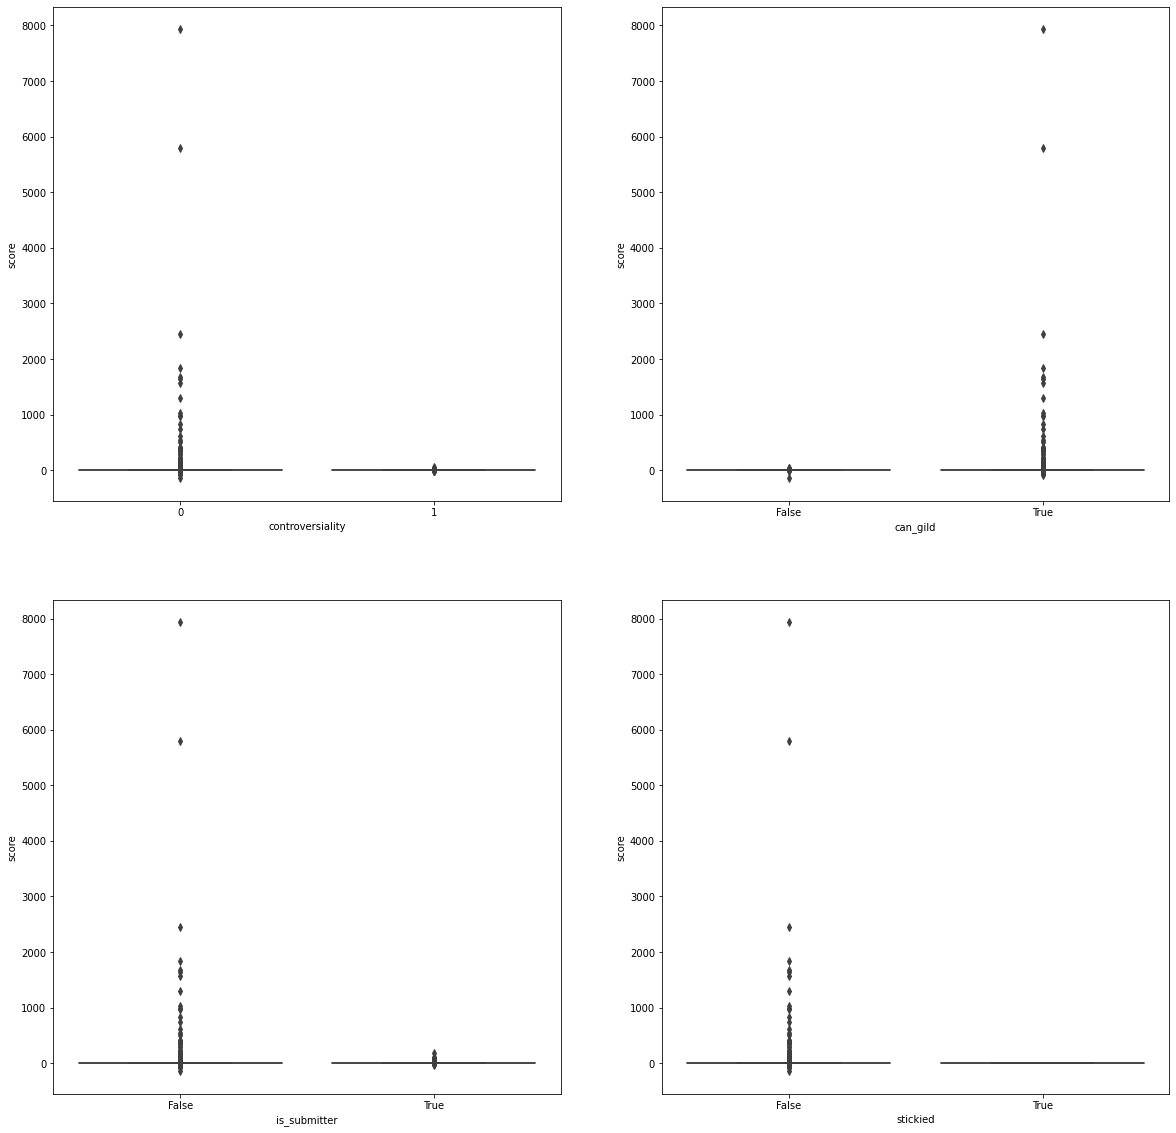

In [18]:
fig,axes=plt.subplots(2,2,figsize=(20,20))
sns.boxplot(x=df1['controversiality'],y=df1['score'],ax=axes[0,0])
sns.boxplot(x=df1['can_gild'],y=df1['score'],ax=axes[0,1])
sns.boxplot(x=df1['is_submitter'],y=df1['score'],ax=axes[1,0])
sns.boxplot(x=df1['stickied'],y=df1['score'],ax=axes[1,1])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


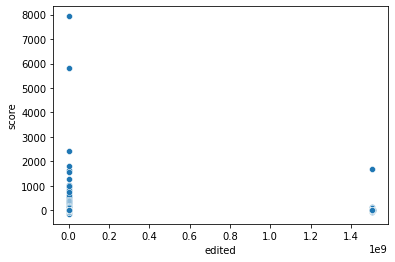

In [19]:
sns.scatterplot(df1['edited'],df1['score'])

We can drop the gilded column as it is containing single value for all the rows.

In [20]:
len(df1['created_utc'].unique())

313

In [21]:
len(df1['retrieved_on'].unique())

107

In [22]:
df1.tail(2)

author  ... subreddit
9998      danman794  ...    premed
9999  Falloutguy100  ...   singing

[2 rows x 12 columns]

Dropping gilded,author and subreddit columns from the dataframe.

In [23]:
df2=df1.drop(columns=['gilded','author','subreddit'])
df2.tail(2)

body  ...  stickied
9998                          Dude thicc always gets me  ...     False
9999  I wasn't thinking about pushing breath. That's...  ...     False

[2 rows x 9 columns]

retrived_on feature tells us the time at which the post is first seen and the created_utc feature tells us the time at which post is created.We can create a feature called time_lapse which show the time between  posting and first time retriving.And also we can drop the retrived_on column as well.

In [24]:
df2['created_utc'].dtype

dtype('int64')

In [25]:
from datetime import datetime
df.shape[0]

10000

In [26]:
print(datetime.fromtimestamp(df2['created_utc'][0]))

2017-10-01 00:00:00


In [27]:
def conv_timestamp_to_date(data):
  dt_obj=datetime.fromtimestamp(data)
  return dt_obj

In [28]:
df2['new_created_utc']=df2['created_utc'].apply(conv_timestamp_to_date)
df2['new_retrieved_on']=df2['retrieved_on'].apply(conv_timestamp_to_date)

In [29]:
df2.tail()

body  ...    new_retrieved_on
9995  My security acts silently, so you can work, ef...  ... 2017-10-28 11:22:13
9996                                          [deleted]  ... 2017-10-28 11:22:13
9997           Is it possible to find them in the wild?  ... 2017-10-28 11:22:13
9998                          Dude thicc always gets me  ... 2017-10-28 11:22:13
9999  I wasn't thinking about pushing breath. That's...  ... 2017-10-28 11:22:13

[5 rows x 11 columns]

In [30]:
df2['time_lapse']=df2['new_retrieved_on']-df2['new_created_utc']
df2.head()

body  ...       time_lapse
0                                           A quarry  ... 27 days 11:20:06
1  [Salutations! I'm not sure what you said.](htt...  ... 27 days 11:20:06
2  I got into baseball at about he same time Matt...  ... 27 days 11:20:06
3                                       FUCKING TORY  ... 27 days 11:20:06
4                              I see a water dragon   ... 27 days 11:20:06

[5 rows x 12 columns]

In [31]:
df2=pd.get_dummies(df2,columns=['can_gild','controversiality','is_submitter','stickied'],drop_first=True)
df2.head()

body  ...  stickied_True
0                                           A quarry  ...              0
1  [Salutations! I'm not sure what you said.](htt...  ...              0
2  I got into baseball at about he same time Matt...  ...              0
3                                       FUCKING TORY  ...              0
4                              I see a water dragon   ...              0

[5 rows x 12 columns]

In [32]:
df3=df2.drop(columns=['created_utc','retrieved_on','new_retrieved_on','new_created_utc'])
df3.head()

body  ...  stickied_True
0                                           A quarry  ...              0
1  [Salutations! I'm not sure what you said.](htt...  ...              0
2  I got into baseball at about he same time Matt...  ...              0
3                                       FUCKING TORY  ...              0
4                              I see a water dragon   ...              0

[5 rows x 8 columns]

In [33]:
def to_sec(time):
  val=time.total_seconds()
  return val

In [34]:
df3['time_lapse']=df3['time_lapse'].apply(to_sec)
df3['length']=df3['body'].apply(len)

In [35]:
df3.head(2)

body  ...  length
0                                           A quarry  ...       8
1  [Salutations! I'm not sure what you said.](htt...  ...      72

[2 rows x 9 columns]

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df3['time_lapse']=sc.fit_transform(df3['time_lapse'].values.reshape(-1,1))
df3['score']=sc.fit_transform(df3['score'].values.reshape(-1,1))
df3['length']=sc.fit_transform(df3['length'].values.reshape(-1,1))

In [37]:
df3.head(2)

body  ...    length
0                                           A quarry  ... -0.457580
1  [Salutations! I'm not sure what you said.](htt...  ... -0.265563

[2 rows x 9 columns]

In [38]:
import nltk
df3['body'].replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def remov_stops(text):
  text1=[word.lower() for word in text.split() if word.lower() not in stop_words]
  return  " ".join(text1)

In [41]:
df3['body']=df3['body'].apply(remov_stops) #after removing stopwords
df3.head(2)

body  edited  ...  stickied_True    length
0                                       quarry       0  ...              0 -0.457580
1  salutations sure said http imgur com ttainh       0  ...              0 -0.265563

[2 rows x 9 columns]

In [42]:
from nltk.stem.snowball import SnowballStemmer
stemmer=SnowballStemmer('english')
def stem(text):
  text1 = [stemmer.stem(word) for word in text.split()]
  return " ".join(text1)

In [43]:
df3['body']=df3['body'].apply(stem)

In [44]:
df3.head(2)

body  edited  ...  stickied_True    length
0                                 quarri       0  ...              0 -0.457580
1  salut sure said http imgur com ttainh       0  ...              0 -0.265563

[2 rows x 9 columns]

In [45]:
df_train=df3[0:7000]
df_test=df3[7000:]
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=6000)
x_train1=df_train.drop(columns=['score','body'])
x1=cv.fit_transform(df_train['body'])

In [46]:
x_train2=pd.DataFrame(x1.todense(),columns=cv.get_feature_names())
x_train=pd.concat([x_train1,x_train2],axis=1)

In [47]:
x_train

edited  time_lapse  can_gild_True  ...  zotac   zr   zt
0          0    1.740798              1  ...    0.0  0.0  0.0
1          0    1.740798              1  ...    0.0  0.0  0.0
2          0    1.740798              1  ...    0.0  0.0  0.0
3          0    1.740798              1  ...    0.0  0.0  0.0
4          0    1.740798              1  ...    0.0  0.0  0.0
...      ...         ...            ...  ...    ...  ...  ...
6995       0   -0.708370              1  ...    0.0  0.0  0.0
6996       0   -0.708370              1  ...    0.0  0.0  0.0
6997       0   -0.708370              1  ...    0.0  0.0  0.0
6998       0   -0.708370              1  ...    0.0  0.0  0.0
6999       0   -0.708370              1  ...    0.0  0.0  0.0

[7000 rows x 6007 columns]

In [48]:
y_train=df_train['score']

In [49]:
x_test1=df_test.drop(columns=['score','body'])
x_test1

edited  time_lapse  ...  stickied_True    length
7000       0   -0.708370  ...              0  0.091467
7001       0   -0.708370  ...              0 -0.184557
7002       0   -0.708370  ...              0 -0.259563
7003       0   -0.708370  ...              0 -0.298566
7004       0   -0.708370  ...              0 -0.328569
...      ...         ...  ...            ...       ...
9995       0   -1.717951  ...              0 -0.313568
9996       0   -1.717951  ...              0 -0.454580
9997       0   -1.717951  ...              0 -0.361572
9998       0   -1.717951  ...              0 -0.406576
9999       0   -1.717951  ...              0  0.856532

[3000 rows x 7 columns]

In [51]:
cv2=TfidfVectorizer(max_features=6000)
x2=cv2.fit_transform(df_test['body'])
x2

<3000x6000 sparse matrix of type '<class 'numpy.float64'>'
	with 36681 stored elements in Compressed Sparse Row format>

In [52]:
x_test2=pd.DataFrame(x2.todense(),columns=cv2.get_feature_names())

In [53]:
x_test2

aa  aaa  aaaaaaaaaahhhh  aac  aaron  ...  zur  zusammenh  zwar  zwei  zweier
0     0.0  0.0             0.0  0.0    0.0  ...  0.0        0.0   0.0   0.0     0.0
1     0.0  0.0             0.0  0.0    0.0  ...  0.0        0.0   0.0   0.0     0.0
2     0.0  0.0             0.0  0.0    0.0  ...  0.0        0.0   0.0   0.0     0.0
3     0.0  0.0             0.0  0.0    0.0  ...  0.0        0.0   0.0   0.0     0.0
4     0.0  0.0             0.0  0.0    0.0  ...  0.0        0.0   0.0   0.0     0.0
...   ...  ...             ...  ...    ...  ...  ...        ...   ...   ...     ...
2995  0.0  0.0             0.0  0.0    0.0  ...  0.0        0.0   0.0   0.0     0.0
2996  0.0  0.0             0.0  0.0    0.0  ...  0.0        0.0   0.0   0.0     0.0
2997  0.0  0.0             0.0  0.0    0.0  ...  0.0        0.0   0.0   0.0     0.0
2998  0.0  0.0             0.0  0.0    0.0  ...  0.0        0.0   0.0   0.0     0.0
2999  0.0  0.0             0.0  0.0    0.0  ...  0.0        0.0   0.0   0.0     0.0

[3000 rows x 6000 columns]

In [55]:
x_test1.reset_index(inplace=True,drop=True)
x_test1

index  edited  time_lapse  ...  is_submitter_True  stickied_True    length
0      7000       0   -0.708370  ...                  0              0  0.091467
1      7001       0   -0.708370  ...                  0              0 -0.184557
2      7002       0   -0.708370  ...                  0              0 -0.259563
3      7003       0   -0.708370  ...                  0              0 -0.298566
4      7004       0   -0.708370  ...                  0              0 -0.328569
...     ...     ...         ...  ...                ...            ...       ...
2995   9995       0   -1.717951  ...                  0              0 -0.313568
2996   9996       0   -1.717951  ...                  0              0 -0.454580
2997   9997       0   -1.717951  ...                  0              0 -0.361572
2998   9998       0   -1.717951  ...                  1              0 -0.406576
2999   9999       0   -1.717951  ...                  1              0  0.856532

[3000 rows x 8 columns]

In [56]:
x_t=x_test1.drop(columns=['index'])
x_t

edited  time_lapse  ...  stickied_True    length
0          0   -0.708370  ...              0  0.091467
1          0   -0.708370  ...              0 -0.184557
2          0   -0.708370  ...              0 -0.259563
3          0   -0.708370  ...              0 -0.298566
4          0   -0.708370  ...              0 -0.328569
...      ...         ...  ...            ...       ...
2995       0   -1.717951  ...              0 -0.313568
2996       0   -1.717951  ...              0 -0.454580
2997       0   -1.717951  ...              0 -0.361572
2998       0   -1.717951  ...              0 -0.406576
2999       0   -1.717951  ...              0  0.856532

[3000 rows x 7 columns]

In [57]:
x_test=pd.concat([x_t,x_test2],axis=1)
y_test=df_test['score']

In [58]:
x_test

edited  time_lapse  can_gild_True  ...  zwar  zwei  zweier
0          0   -0.708370              1  ...   0.0   0.0     0.0
1          0   -0.708370              1  ...   0.0   0.0     0.0
2          0   -0.708370              1  ...   0.0   0.0     0.0
3          0   -0.708370              1  ...   0.0   0.0     0.0
4          0   -0.708370              1  ...   0.0   0.0     0.0
...      ...         ...            ...  ...   ...   ...     ...
2995       0   -1.717951              1  ...   0.0   0.0     0.0
2996       0   -1.717951              1  ...   0.0   0.0     0.0
2997       0   -1.717951              1  ...   0.0   0.0     0.0
2998       0   -1.717951              1  ...   0.0   0.0     0.0
2999       0   -1.717951              1  ...   0.0   0.0     0.0

[3000 rows x 6007 columns]

In [59]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
y_pred=model.predict(x_test)
from sklearn.metrics import mean_absolute_error
print('MAE is',mean_absolute_error(y_test,y_pred))

MAE is 104.31763981117813


In [61]:
print('Test score is',model.score(x_test,y_test))

Test score is -24262.472199172425


In [62]:
from sklearn.neighbors import KNeighborsRegressor
model2=KNeighborsRegressor(n_neighbors=5)
model2.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [63]:
y_pred2=model2.predict(x_test)
from sklearn.metrics import mean_absolute_error
print('MAE is',mean_absolute_error(y_test,y_pred2))

MAE is 0.06802946214084987


In [64]:
print('Test score is',model2.score(x_test,y_test))

Test score is -0.0034492616762020756
